# Examples - Predictions

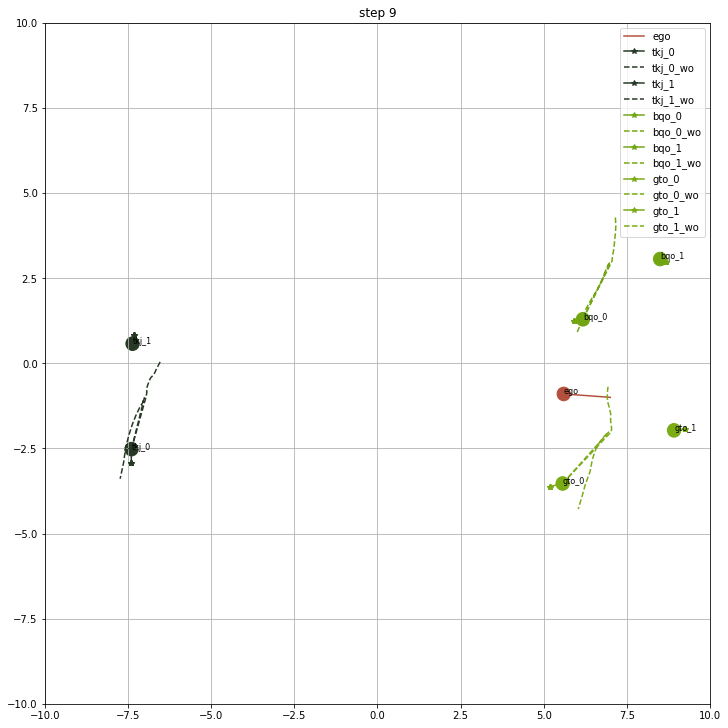

In [4]:
import torch

from mantrap.environment import PotentialFieldEnvironment, SocialForcesEnvironment, Trajectron
from mantrap.utility.primitives import straight_line
from mantrap_evaluation.scenarios import scenario_haruki

from IPython.display import HTML

env, goal = scenario_haruki(env_class=Trajectron)

ego_path = straight_line(env.ego.position, goal, steps=11)
ego_trajectory = env.ego.expand_trajectory(ego_path, dt=env.dt)

HTML(env.visualize_prediction(ego_trajectory=ego_trajectory, enforce=True, interactive=True))